In [3]:
import numpy as np
from scipy import stats 
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker

In [5]:
engine = create_engine("postgresql:///music", echo=True)
Session = sessionmaker(bind=engine)
session = Session()
con = engine.connect()

2019-05-08 10:36:03,901 INFO sqlalchemy.engine.base.Engine select version()
2019-05-08 10:36:03,902 INFO sqlalchemy.engine.base.Engine {}
2019-05-08 10:36:03,904 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-05-08 10:36:03,905 INFO sqlalchemy.engine.base.Engine {}
2019-05-08 10:36:03,906 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-08 10:36:03,907 INFO sqlalchemy.engine.base.Engine {}
2019-05-08 10:36:03,908 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-08 10:36:03,908 INFO sqlalchemy.engine.base.Engine {}
2019-05-08 10:36:03,909 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-05-08 10:36:03,910 INFO sqlalchemy.engine.base.Engine {}


In [20]:
query = """
    SELECT score
    FROM reviews
    """
result = con.execute(query).fetchall()

2019-05-08 10:49:53,882 INFO sqlalchemy.engine.base.Engine 
    SELECT score
    FROM reviews
    
2019-05-08 10:49:53,883 INFO sqlalchemy.engine.base.Engine {}


In [22]:
review_scores = [tup[0] for tup in result]

In [54]:
review_scores[0], len(review_scores)

(9.3, 18393)

In [60]:
bs_samples = []
for _ in range(1000):
     bs_samples.append(np.random.choice(a=review_scores, size=len(review_scores)))

In [61]:
bs_means = [np.mean(sample) for sample in bs_samples]

(array([ 1.,  0.,  0.,  2.,  1.,  1.,  4.,  9., 12., 19., 22., 34., 53.,
        68., 77., 81., 74., 77., 75., 76., 85., 59., 45., 50., 21., 21.,
        11., 12.,  5.,  5.]),
 array([6.96938509, 6.97144946, 6.97351384, 6.97557821, 6.97764258,
        6.97970695, 6.98177133, 6.9838357 , 6.98590007, 6.98796444,
        6.99002882, 6.99209319, 6.99415756, 6.99622193, 6.9982863 ,
        7.00035068, 7.00241505, 7.00447942, 7.00654379, 7.00860817,
        7.01067254, 7.01273691, 7.01480128, 7.01686566, 7.01893003,
        7.0209944 , 7.02305877, 7.02512314, 7.02718752, 7.02925189,
        7.03131626]),
 <a list of 30 Patch objects>)

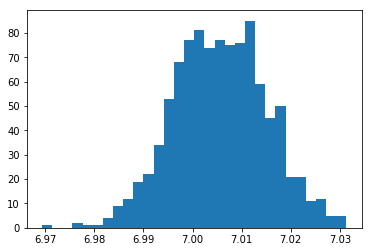

In [62]:
plt.hist(bs_means, bins=30)

In [67]:
np.percentile(bs_means, .1), np.percentile(bs_means, 99.9)

(6.976288419507421, 7.030354901321155)

In [68]:
np.mean(review_scores)

7.005779372587398

In [69]:
np.percentile(bs_means, 99.9) - np.mean(review_scores)

0.02457552873375679